In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.sample(5)

,sms,label
4299,WELL DONE! Your 4* Costa Del Sol Holiday or £5...,1
2150,Waaaat?? Lololo ok next time then!\n,0
1210,His bday real is in april .\n,0
2167,"Thank you. And by the way, I just lost.\n",0
5526,You are awarded a SiPix Digital Camera! call 0...,1


In [4]:
df.shape

(5574, 2)

## 1.data ceaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
# to drop column we use df.drop(columns=[])

In [7]:
# rename column

df.rename(columns={'label':'target'},inplace=True)
df.sample(5)

,sms,target
4038,Dont flatter yourself... Tell that man of mine...,0
2286,"Hi, wkend ok but journey terrible. Wk not good...",0
3225,Sorry da thangam.it's my mistake.\n,0
4753,Well boy am I glad G wasted all night at apple...,0
4676,"Hi babe its Chloe, how r u? I was smashed on s...",1


In [8]:
#missing values

df.isnull().sum()


sms       0
target    0
dtype: int64

In [9]:
#check for duplicate
df.duplicated().sum()

403

In [10]:
# remove duplicate
df=df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5171, 2)

2.EDA

In [13]:
df.head()

,sms,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
df['target'].value_counts()

0    4518
1     653
Name: target, dtype: int64

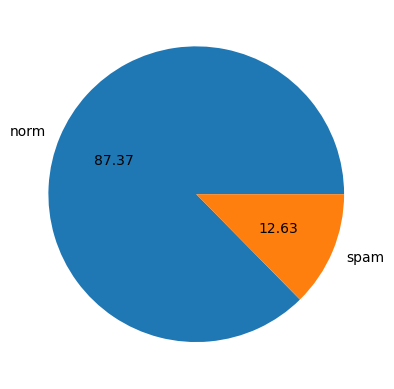

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['norm','spam'],autopct='%0.2f')
plt.show()

In [16]:
#data is inmbalanced

In [17]:
import nltk    #natural language toolkit

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vishakh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
  #adding extra column having total character contain in the text
df['num_char']=df['sms'].apply(len)

In [20]:
df.head()

,sms,target,num_char
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [21]:
# num of words
df['num_words']=df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,sms,target,num_char,num_words
0,"Go until jurong point, crazy.. Available only ...",0,112,24
1,Ok lar... Joking wif u oni...\n,0,30,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37
3,U dun say so early hor... U c already then say...,0,50,13
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15


In [23]:
 df['num_sent']=df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,sms,target,num_char,num_words,num_sent
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1


In [25]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5171.000000,5171.000000,5171.000000
mean,80.332431,18.606459,1.973893
std,58.333188,13.388223,1.458880
min,3.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,62.000000,15.000000,1.000000
75%,120.000000,26.500000,2.000000
max,911.000000,220.000000,38.000000


In [26]:
# norm
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4518.000000,4518.000000,4518.000000
mean,71.894865,17.282205,1.827579
std,56.590179,13.572746,1.394245
min,3.000000,1.000000,1.000000
25%,35.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,911.000000,220.000000,38.000000


In [27]:
# spam
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,138.710567,27.768760,2.986217
std,29.818940,6.987509,1.494815
min,14.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

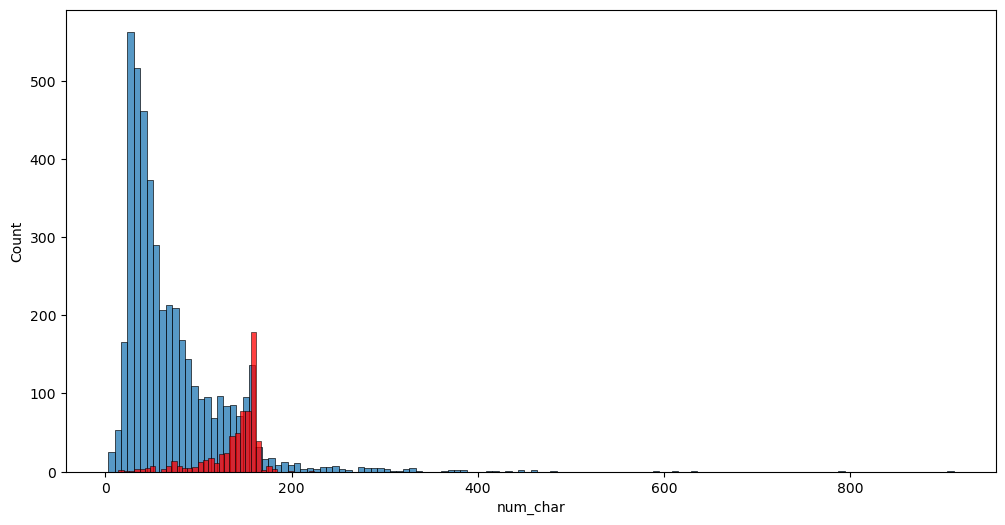

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]['num_char'])
sns.histplot(df[df["target"]==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

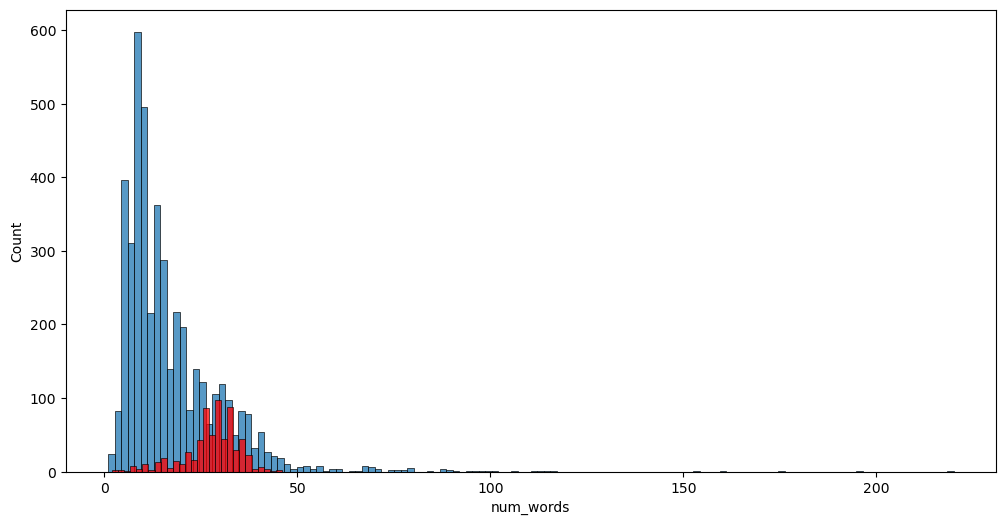

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]['num_words'])
sns.histplot(df[df["target"]==1]['num_words'],color='red')

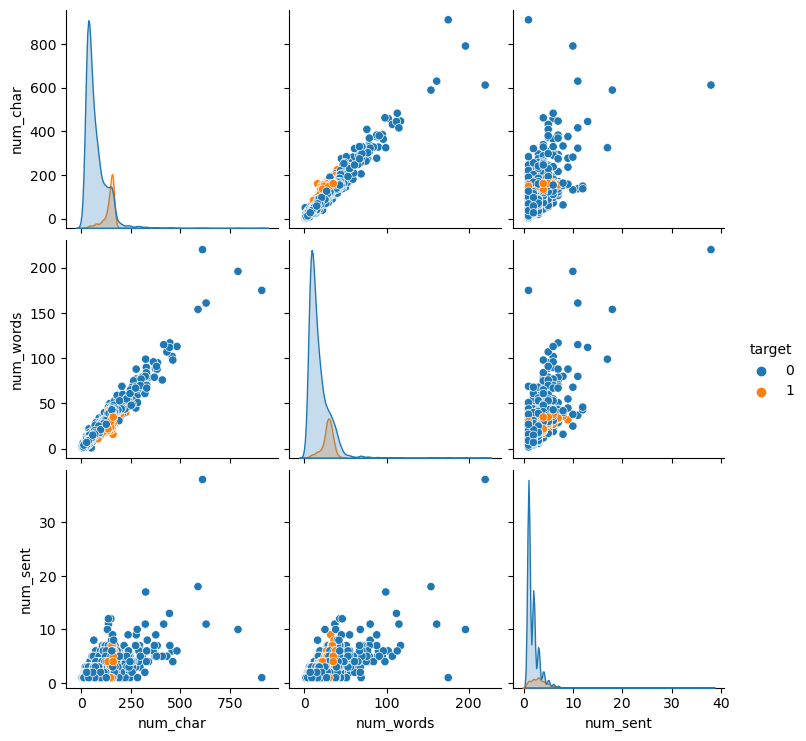

In [31]:

sns.pairplot(df,hue='target')

In [32]:
df.head()


,sms,target,num_char,num_words,num_sent
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1


In [33]:
df.head()

,sms,target,num_char,num_words,num_sent
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2
1,Ok lar... Joking wif u oni...\n,0,30,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2
3,U dun say so early hor... U c already then say...,0,50,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1


In [34]:
df.sample(5)

,sms,target,num_char,num_words,num_sent
137,He is there. You call and meet him\n,0,35,9,2
306,Yup... From what i remb... I think should be c...,0,58,14,2
5306,Pls ask macho how much is budget for bb bold 2...,0,95,28,1
58,Tell where you reached\n,0,23,4,1
5382,Its sunny in california. The weather's just co...,0,49,10,2


C:\Users\Vishakh\AppData\Local\Temp\ipykernel_9384\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

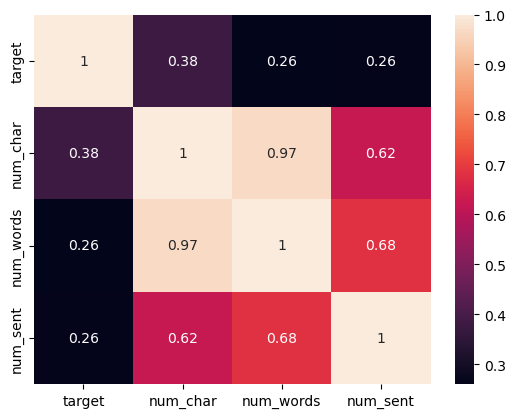

In [35]:
sns.heatmap(df.corr(),annot=True)

# 3.data preprocessing


In [36]:
 def transform_text(text):
        text=text.lower()# lowercase
        text=nltk.word_tokenize(text)    #tokenize
        y=[]
        for i in text:     #removing special characters
            if i.isalnum():
                y.append(i)
                
        text=y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
                
                
        text=y[:]
        y.clear()
        for i in text:
            y.append(ps.stem(i))
            
        return " ".join(y)
    
    

In [37]:
from nltk.corpus import stopwords
import string


In [38]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [39]:
df['sms'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'

In [40]:
df['transformed_text']=df['sms'].apply(transform_text)

In [41]:
df.head()

,sms,target,num_char,num_words,num_sent,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


In [42]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

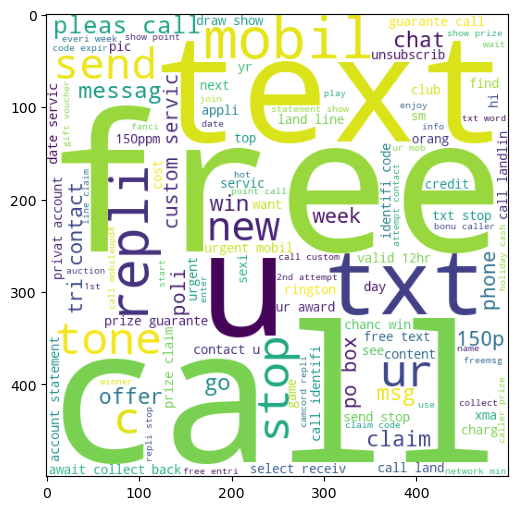

In [44]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [45]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

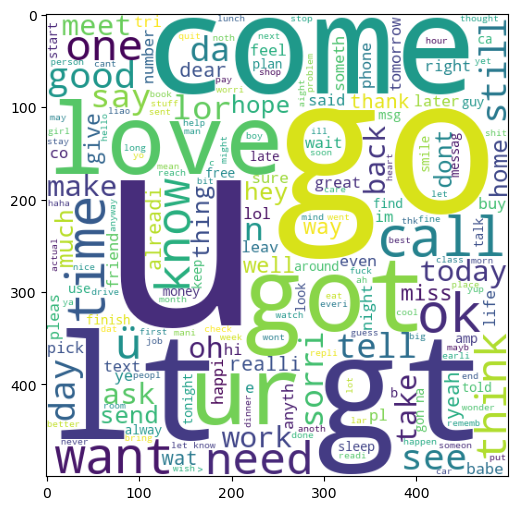

In [46]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [47]:
df.head()

,sms,target,num_char,num_words,num_sent,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,112,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,15,1,nah think goe usf live around though


In [48]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
        for word in msg.split():
            spam_corpus.append(word)

In [49]:
len(spam_corpus)

9982

In [50]:
#from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
#plt.xticks(rotation='vertical')
#plt.show()

In [51]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
        for word in msg.split():
            ham_corpus.append(word)

In [52]:
len(ham_corpus)

35937

In [53]:
from collections import Counter
#sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
#plt.xticks(rotation='vertical')
#plt.show()

# 4.model building


In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
X.shape

(5171, 3000)

In [57]:
y=df['target'].values

In [58]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8695652173913043
[[782 105]
 [ 30 118]]
0.5291479820627802


In [94]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9603864734299516
[[887   0]
 [ 41 107]]
1.0


In [65]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729468599033816
[[886   1]
 [ 27 121]]
0.9918032786885246


In [66]:
#  tfidf --->MNB

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [71]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.966183574879227, 0.9747899159663865)

In [72]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.966183574879227
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9053140096618357
Precision -  1.0
For  NB
Accuracy -  0.9603864734299516
Precision -  1.0
For  DT
Accuracy -  0.9159420289855073
Precision -  0.8505747126436781
For  LR
Accuracy -  0.9449275362318841
Precision -  0.941747572815534
For  RF
Accuracy -  0.9652173913043478
Precision -  1.0
For  AdaBoost
Accuracy -  0.9594202898550724
Precision -  0.9649122807017544
For  BgC
Accuracy -  0.9536231884057971
Precision -  0.9166666666666666
For  ETC
Accuracy -  0.9719806763285024
Precision -  0.983739837398374
For  GBDT
Accuracy -  0.9381642512077295
Precision -  0.9772727272727273
For  xgb
Accuracy -  0.9632850241545894
Precision -  0.9824561403508771


In [73]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [74]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905314,1.000000
2,NB,0.960386,1.000000
5,RF,0.965217,1.000000
8,ETC,0.971981,0.983740
10,xgb,0.963285,0.982456
9,GBDT,0.938164,0.977273
0,SVC,0.966184,0.974790
6,AdaBoost,0.959420,0.964912
4,LR,0.944928,0.941748
7,BgC,0.953623,0.916667


In [75]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [76]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905314
1,NB,Accuracy,0.960386
2,RF,Accuracy,0.965217
3,ETC,Accuracy,0.971981
4,xgb,Accuracy,0.963285
5,GBDT,Accuracy,0.938164
6,SVC,Accuracy,0.966184
7,AdaBoost,Accuracy,0.959420
8,LR,Accuracy,0.944928
9,BgC,Accuracy,0.953623


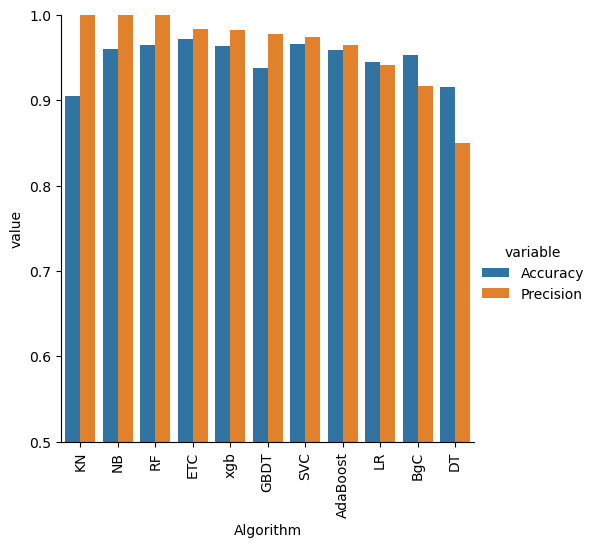

In [77]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [80]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [81]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [82]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [84]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905314,1.000000,0.905314,1.000000,0.905314,1.000000,0.905314,1.000000
1,NB,0.960386,1.000000,0.960386,1.000000,0.960386,1.000000,0.960386,1.000000
2,RF,0.965217,1.000000,0.965217,1.000000,0.965217,1.000000,0.965217,1.000000
3,ETC,0.971981,0.983740,0.971981,0.983740,0.971981,0.983740,0.971981,0.983740
4,xgb,0.963285,0.982456,0.963285,0.982456,0.963285,0.982456,0.963285,0.982456
5,GBDT,0.938164,0.977273,0.938164,0.977273,0.938164,0.977273,0.938164,0.977273
6,SVC,0.966184,0.974790,0.966184,0.974790,0.966184,0.974790,0.966184,0.974790
7,AdaBoost,0.959420,0.964912,0.959420,0.964912,0.959420,0.964912,0.959420,0.964912
8,LR,0.944928,0.941748,0.944928,0.941748,0.944928,0.941748,0.944928,0.941748
9,BgC,0.953623,0.916667,0.953623,0.916667,0.953623,0.916667,0.953623,0.916667


In [85]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [86]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [87]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [88]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9719806763285024
Precision 1.0


In [89]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [90]:
from sklearn.ensemble import StackingClassifier

In [91]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [92]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9797101449275363
Precision 0.9774436090225563


In [93]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))